In [40]:
from fastai.vision import *

In [79]:
folder = 'apple'
file = 'urls_apple.csv'

In [80]:
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [81]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [82]:
folder = 'cherry'
file = 'urls_cherry.csv'

In [83]:
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [84]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [85]:
folder = 'strawberry'
file = 'urls_strawberry.csv'

In [86]:
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [87]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [88]:
path.ls()

[PosixPath('data/fruit/apple'),
 PosixPath('data/fruit/urls_strawberry.csv'),
 PosixPath('data/fruit/strawberry'),
 PosixPath('data/fruit/cherry'),
 PosixPath('data/fruit/urls_apple.csv'),
 PosixPath('data/fruit/.ipynb_checkpoints'),
 PosixPath('data/fruit/urls_cherry.csv')]

In [89]:
classes = ['apple','cherry','strawberry']

In [93]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

apple


cherry


strawberry


In [94]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [92]:
data.classes

['apple', 'cherry', 'strawberry']

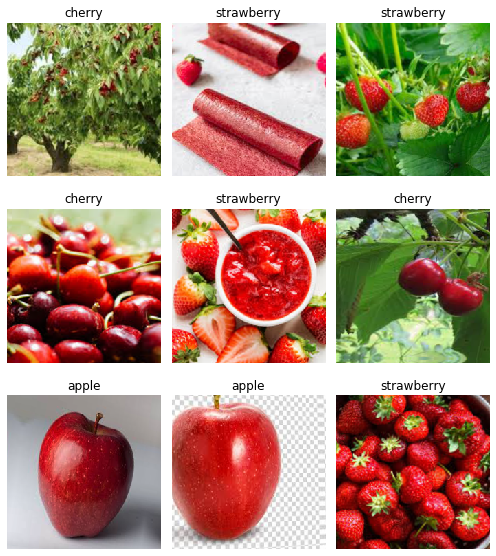

In [95]:
data.show_batch(rows=3, figsize=(7,8))

In [96]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple', 'cherry', 'strawberry'], 3, 384, 96)

In [97]:
#train model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [98]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.749313,0.406432,0.145833,00:03
1,1.047840,0.252789,0.083333,00:01
2,0.746181,0.156948,0.062500,00:01
3,0.585957,0.143706,0.052083,00:01


In [99]:
learn.save('stage-1')

In [100]:
learn.unfreeze()

In [101]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


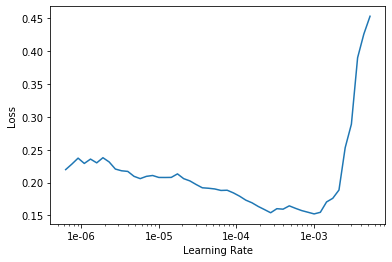

In [102]:
learn.recorder.plot()

In [103]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.212320,0.257630,0.072917,00:02
1,0.143563,0.233004,0.083333,00:02


In [104]:
learn.save('stage-2')

In [105]:
learn.load('stage-2');

In [106]:
interp = ClassificationInterpretation.from_learner(learn)

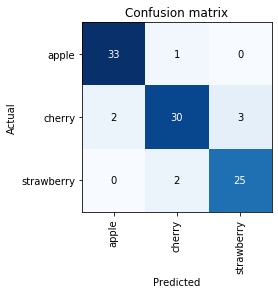

In [107]:
interp.plot_confusion_matrix()

In [108]:
from fastai.widgets import *

In [109]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [110]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [111]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [112]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [113]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [114]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [115]:
learn.export()

In [116]:
defaults.device = torch.device('cpu')

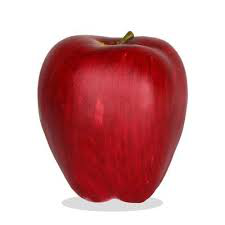

In [136]:
img = open_image(path/'apple'/'00000023.jpg')
img

In [137]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category apple

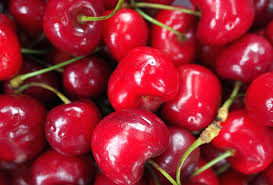

In [138]:
img = open_image(path/'cherry'/'00000002.jpg')
img

In [139]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category cherry

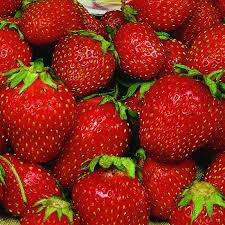

In [140]:
img = open_image(path/'strawberry'/'00000008.jpg')
img

In [141]:
learn = load_learner(path)

In [142]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category strawberry

In [143]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [144]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,21.250473,4117592832.000000,0.635417,00:02


In [145]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [146]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.255479,1.959332,0.729167,00:02
1,2.201927,1.804765,0.677083,00:02
2,2.133210,1.680330,0.666667,00:02
3,2.128195,1.615205,0.635417,00:02
4,2.119552,1.600080,0.666667,00:02


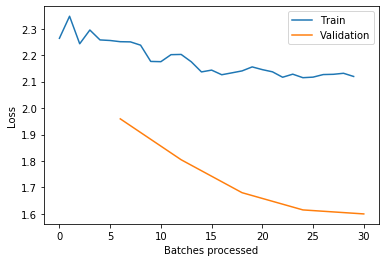

In [147]:
learn.recorder.plot_losses()

In [148]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [149]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.953452,2.617173,0.708333,00:02


In [150]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [151]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [152]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.074015,2.137445,0.685185,00:03
1,2.188807,2.035185,0.682870,00:01
2,2.009565,1.922433,0.694444,00:01
3,1.943128,1.792586,0.701389,00:01
4,1.839944,1.657233,0.694444,00:01
5,1.798486,1.514933,0.692130,00:01
6,1.644297,1.380046,0.659722,00:01
7,1.520568,1.249272,0.581019,00:01
8,1.399310,1.124454,0.504630,00:01
9,1.274853,1.004279,0.437500,00:01
